In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


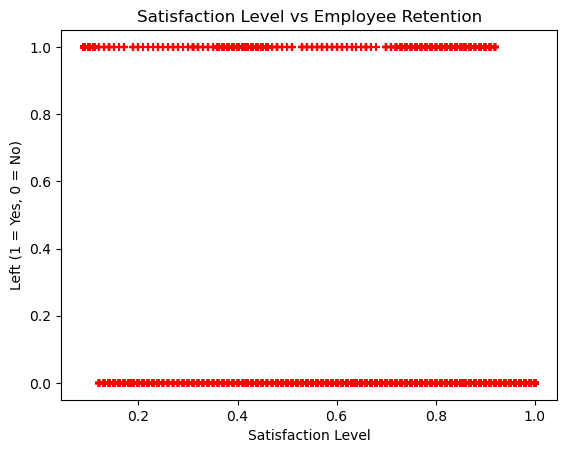

In [3]:
import matplotlib.pyplot as plt

# Scatter plot for satisfaction level vs employee retention
plt.scatter(df['satisfaction_level'], df['left'], marker='+', color='red')
plt.xlabel('Satisfaction Level')
plt.ylabel('Left (1 = Yes, 0 = No)')
plt.title('Satisfaction Level vs Employee Retention')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

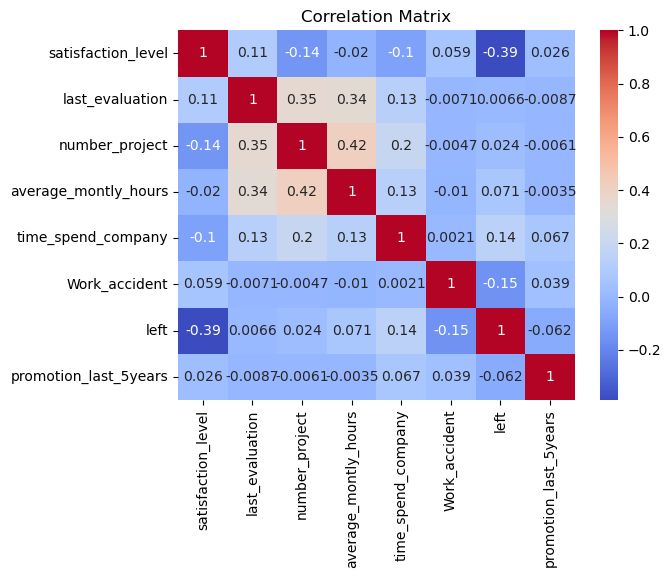

In [4]:
# Check the data types and for any missing values
print(df.info())
print(df.describe())
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create a heatmap to visualize correlations
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

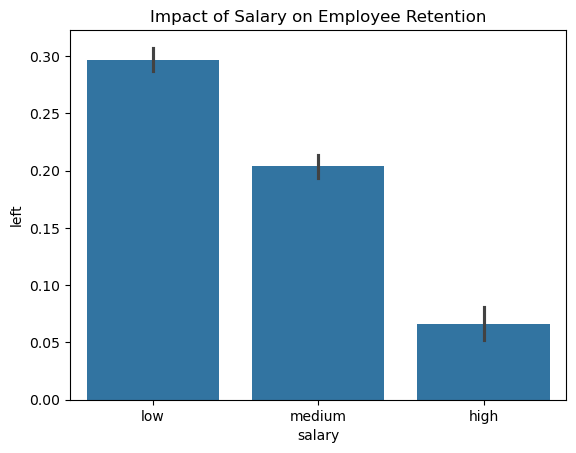

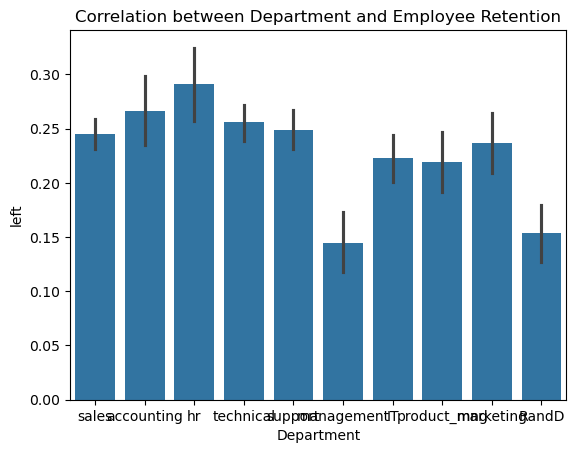

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart showing the impact of salaries on retention
sns.barplot(x='salary', y='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.show()

# Bar chart showing the correlation between department and retention
sns.barplot(x='Department', y='left', data=df)
plt.title('Correlation between Department and Employee Retention')
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select relevant features based on EDA
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 
        'average_montly_hours', 'time_spend_company', 'Work_accident', 
        'promotion_last_5years', 'salary', 'Department']]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Define the target variable
y = df['left']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))



Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3462
           1       0.58      0.34      0.43      1038

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.77      0.79      0.77      4500



In [8]:
model.predict_proba(X_test)

array([[0.70405355, 0.29594645],
       [0.75801845, 0.24198155],
       [0.95275181, 0.04724819],
       ...,
       [0.90382315, 0.09617685],
       [0.86067158, 0.13932842],
       [0.27768661, 0.72231339]])

In [9]:
model.score(X_test,y_test)

0.7913333333333333

In [10]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [11]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
1670,0.44,0.57,2,141,3,0,0,False,True,False,False,False,False,False,True,False,False,False
13378,0.55,0.96,3,194,3,0,0,False,True,False,False,False,False,False,True,False,False,False
10233,0.72,0.67,5,210,2,0,0,False,True,False,False,False,True,False,False,False,False,False
4719,0.96,0.75,4,177,2,0,0,True,False,False,False,False,False,False,False,False,False,False
7003,0.96,0.54,3,198,3,0,0,True,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11275,0.56,0.71,3,211,6,0,1,True,False,False,False,False,False,True,False,False,False,False
3828,0.58,0.79,5,262,2,0,0,False,False,False,False,False,False,False,False,True,False,False
4645,0.85,0.58,4,273,4,0,0,False,True,False,False,False,False,False,False,False,False,False
6069,0.54,0.64,6,278,2,0,0,False,True,False,False,False,False,False,False,False,False,True


In [12]:
model.coef_

array([[-4.03854056,  0.58121575, -0.30133575,  0.00459869,  0.2769356 ,
        -1.44182008, -1.31497942,  1.88052612,  1.3478817 , -0.42792672,
         0.16872142,  0.42731048, -0.19589016,  0.08198307,  0.00507109,
         0.17690176,  0.27417459,  0.26629464]])

In [13]:
model.intercept_

array([-1.65051468])

In [14]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def prediction_function(satisfaction_level, last_evaluation, number_project, 
                        average_montly_hours, time_spend_company, Work_accident, 
                        promotion_last_5years, salary_low, salary_medium, Department_sales):
    # Coefficients as provided (replace these with actual coefficients from your model)
    coefficients = {
        'intercept': -1.53,
        'satisfaction_level': 0.042,
        'last_evaluation': 0.07,  # Example coefficient
        'number_project': 0.05,  # Example coefficient
        'average_montly_hours': 0.01,  # Example coefficient
        'time_spend_company': 0.10,  # Example coefficient
        'Work_accident': -0.25,  # Example coefficient
        'promotion_last_5years': 0.30,  # Example coefficient
        'salary_low': -0.20,  # Example coefficient
        'salary_medium': -0.15,  # Example coefficient
        'Department_sales': -0.10  # Example coefficient
    }

    # Calculate the linear combination
    z = (coefficients['intercept'] +
         coefficients['satisfaction_level'] * satisfaction_level +
         coefficients['last_evaluation'] * last_evaluation +
         coefficients['number_project'] * number_project +
         coefficients['average_montly_hours'] * average_montly_hours +
         coefficients['time_spend_company'] * time_spend_company +
         coefficients['Work_accident'] * Work_accident +
         coefficients['promotion_last_5years'] * promotion_last_5years +
         coefficients['salary_low'] * salary_low +
         coefficients['salary_medium'] * salary_medium +
         coefficients['Department_sales'] * Department_sales)
    
    # Apply sigmoid function
    y = sigmoid(z)
    return y

# Test the prediction function with example data
print(f"Prediction for given features: {prediction_function(
    satisfaction_level=0.5, 
    last_evaluation=0.63, 
    number_project=3, 
    average_montly_hours=180, 
    time_spend_company=2, 
    Work_accident=0, 
    promotion_last_5years=1, 
    salary_low=1,  # Assuming salary is 'low'
    salary_medium=0, 
    Department_sales=1  # Assuming Department is 'sales'
):.2f}")

print(f"Prediction for given features: {prediction_function(
    satisfaction_level=0.70, 
    last_evaluation=0.66, 
    number_project=8, 
    average_montly_hours=262, 
    time_spend_company=7, 
    Work_accident=0, 
    promotion_last_5years=0, 
    salary_low=0, 
    salary_medium=1,  # Assuming salary is 'medium'
    Department_sales=1  # Assuming Department is 'sales'
):.2f}")


Prediction for given features: 0.66
Prediction for given features: 0.88


In [ ]:
#Probability Interpretation:
#0.55: This means there's a 66% chance that the employee with the given features will leave the company.
#0.86: This means there's an 88% chance that the employee with the given features will leave the company.

22BCE8399
R KARTHIKEYAN


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [21]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 640x480 with 0 Axes>

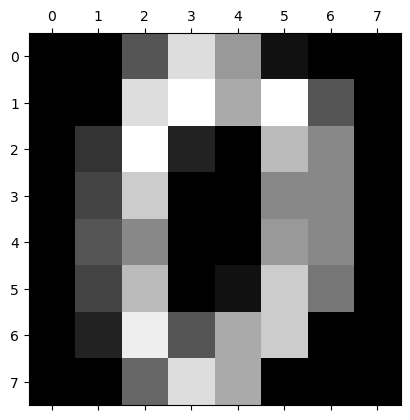

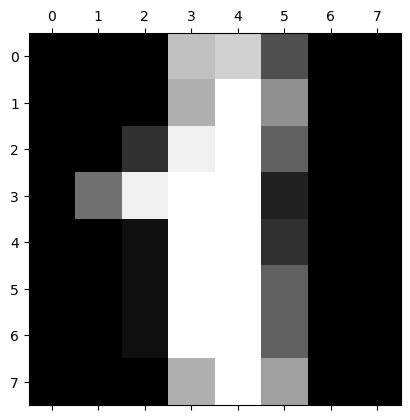

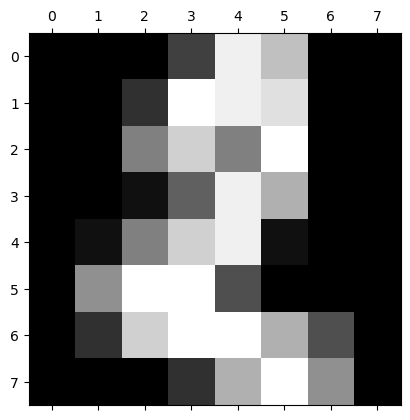

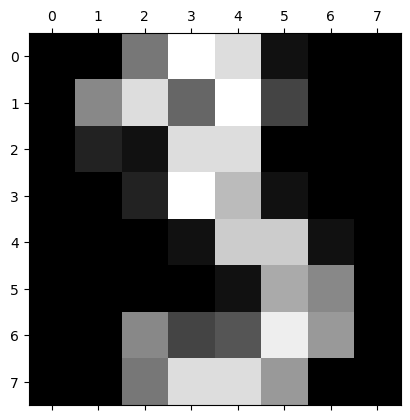

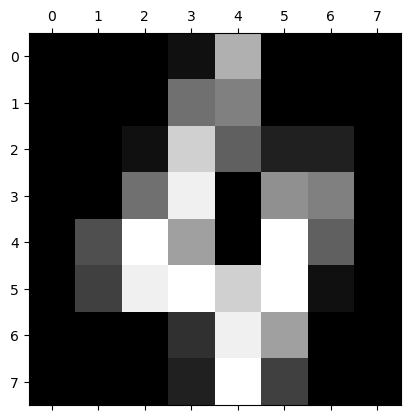

In [22]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [23]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [24]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase from default 100
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [30]:
model.score(X_test, y_test)

0.95

In [31]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [32]:
y_predicted = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  2, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  1,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  1, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 32,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 32]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

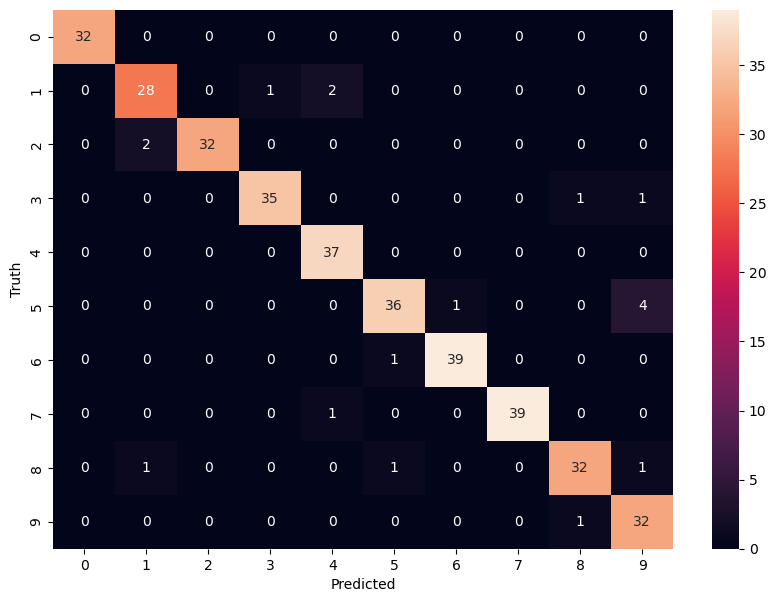

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')